In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('train.csv')
data = data.dropna()
numeric_data = data.drop(['emp_title', 'home_ownership', 'record_id', 'pymnt_plan', 'earliest_cr_line', 'grade', 'sub_grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state'], axis=1)
# numeric_data = numeric_data.sort_values(['emp_length'])
numeric_data['term'] = pd.factorize(numeric_data['term'])[0]
numeric_data['emp_length'] = numeric_data['emp_length'].map({'< 1 year': 0, '1 year':1, '2 years':2,  '3 years':3,  '4 years':4,  '5 years':5,  '6 years':6,  '7 years':7,  '8 years':8,  '9 years':9,  '10+ years': 10})

In [3]:
X = numeric_data.drop('loan_status', axis=1)
y = numeric_data['loan_status']
# y

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model_l1 = LogisticRegression(penalty='l1')
model_l2 = LogisticRegression(penalty='l2')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [5]:
model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
preds_l1 = model_l1.predict(X_test)
preds_l2 = model_l2.predict(X_test)

In [7]:
from sklearn import metrics


preds = model_l1.predict(X_test)

conf_matrix = metrics.confusion_matrix(y_test, preds)
conf_matrix = pd.DataFrame(conf_matrix, index=model_l1.classes_)

In [8]:
conf_matrix

,0,1
0,458,4556
1,388,15301


In [9]:
preds = model_l2.predict(X_test)

conf_matrix = metrics.confusion_matrix(y_test, preds)
conf_matrix = pd.DataFrame(conf_matrix, index=model_l2.classes_)

In [10]:
conf_matrix

,0,1
0,249,4765
1,221,15468


In [11]:
pred_prob_l1 = model_l1.predict_proba(X_test)
preds = pred_prob_l1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


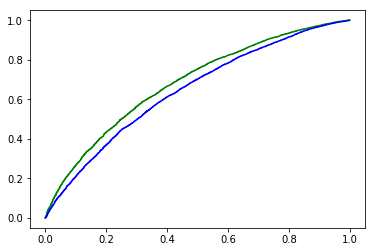

In [12]:
plt.plot(fpr, tpr, 'g')
pred_prob_l2 = model_l2.predict_proba(X_test)
preds = pred_prob_l2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b')
plt.show()